## 导入所需的包

In [1]:
import numpy as np                                         #pandas基于numpy运算
import pandas as pd                                        #引入数据类型DataFrame
from sklearn.linear_model import LinearRegression as LR   #线性回归
from sklearn.preprocessing import StandardScaler          #标准化
from sklearn.model_selection import train_test_split      #划分训练集和测试集
from sklearn.model_selection import cross_val_score       #交叉验证
from sklearn.metrics import mean_squared_error            #均方误差

fch = pd.read_csv(r'C:\Users\Cracker Park\Desktop\培训材料\dataset\fch.csv')   #加利福尼亚房价数据

## 数据探查

In [2]:
fch.shape

(20640, 9)

In [3]:
fch.to_csv('fch.csv')

In [4]:


fch.shape                                    #多少行多少列
fch.info()                                   #数据类型
fch.duplicated().sum()                       #统计重复记录


#更改为中文列名
fch.columns = ['该街区住户的收入中位数','该街区房屋使用年代的中位数'
               ,'该街区平均的房间数目','该街区平均的卧室数目'
               ,'街区人口' ,'平均入住率'
               ,'街区的纬度','街区的经度','房屋价格']
fch.columns

fch.describe().T                             #统计各列数据分布




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  int64  
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  int64  
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


,count,mean,std,min,25%,50%,75%,max
该街区住户的收入中位数,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
该街区房屋使用年代的中位数,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
该街区平均的房间数目,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
该街区平均的卧室数目,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
街区人口,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
平均入住率,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
街区的纬度,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
街区的经度,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
房屋价格,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [5]:
'''fch.rename(columns = {'MedInc' :'该街区住户的收入中位数'
                    ,'HouseAge':'该街区房屋使用年代的中位数'
                    ,'AveRooms':'该街区平均的房间数目'
                    ,'AveBedrms':'该街区平均的卧室数目'
                    ,'Population':'街区人口'
                    ,'AveOccup':'平均入住率'
                    ,'Latitude':'街区的纬度'
                    ,'Longitude':'街区的经度'
                    ,'MedHouseVal':'房屋价格'}, inplace = True)
fch.columns'''

"fch.rename(columns = {'MedInc' :'该街区住户的收入中位数'\n                    ,'HouseAge':'该街区房屋使用年代的中位数'\n                    ,'AveRooms':'该街区平均的房间数目'\n                    ,'AveBedrms':'该街区平均的卧室数目'\n                    ,'Population':'街区人口'\n                    ,'AveOccup':'平均入住率'\n                    ,'Latitude':'街区的纬度'\n                    ,'Longitude':'街区的经度'\n                    ,'MedHouseVal':'房屋价格'}, inplace = True)\nfch.columns"

## 建模

In [6]:
#划分训练集和测试集

x = fch.drop(columns = '房屋价格')
y = fch['房屋价格']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.3, random_state = 1912)
Xtrain.shape, Xtest.shape

((14448, 8), (6192, 8))

In [7]:

reg = LR()                      #实例化
reg = reg.fit(Xtrain, Ytrain)   #训练数据
#调用模型接口接口
reg.score(Xtest, Ytest)         
reg.predict(Xtest)

#查看均方误差

yhat = reg.predict(Xtest)
mean_squared_error(Ytest, yhat) 

#交叉验证
cross_val_score(reg, x, y, cv = 10, scoring = "neg_mean_squared_error")



array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

In [8]:
#截距

reg.intercept_

#特征对应的系数

[*zip(Xtrain.columns, reg.coef_)]

[('该街区住户的收入中位数', 0.4320666224747579),
 ('该街区房屋使用年代的中位数', 0.009280235180097624),
 ('该街区平均的房间数目', -0.09764121410008449),
 ('该街区平均的卧室数目', 0.606264674799182),
 ('街区人口', -2.917683007778657e-06),
 ('平均入住率', -0.004216926637883201),
 ('街区的纬度', -0.4251335258834274),
 ('街区的经度', -0.43584811939078466)]

In [9]:


#系数不好做比较，标准化特征

scaler = StandardScaler()             #实例化
scaler.fit(Xtrain)                    #训练
Xtrain_ssd = scaler.transform(Xtrain) #标准化训练集X
Xtest_ssd = scaler.transform(Xtest)   #标准化测试集X

#重新训练模型

reg_ssd = LR()
reg_ssd = reg.fit(Xtrain_ssd, Ytrain)

#调用接口
reg_ssd.score(Xtest_ssd, Ytest)

yhat_ssd = reg.predict(Xtest_ssd)
mean_squared_error(Ytest, yhat_ssd) 

#查看属性
[*zip(Xtrain.columns, reg_ssd.coef_)]





[('该街区住户的收入中位数', 0.8146300484184064),
 ('该街区房屋使用年代的中位数', 0.11685230857697466),
 ('该街区平均的房间数目', -0.25291616830423996),
 ('该街区平均的卧室数目', 0.3037691439790934),
 ('街区人口', -0.003416400143756421),
 ('平均入住率', -0.028991807937983304),
 ('街区的纬度', -0.9077263615749165),
 ('街区的经度', -0.8740309143622402)]

## 未拟合了足够的信息?

<img src="./underfitting.jpg" style="zoom:80%" />

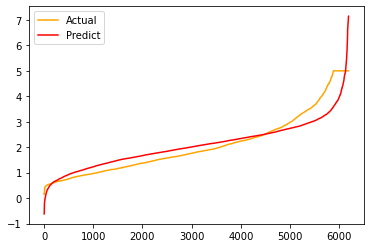

In [10]:
import matplotlib.pyplot as plt 
sorted(Ytest)


plt.plot(range(len(Ytest)),sorted(Ytest),c="orange",label= "Actual") 
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict") 

plt.legend()
plt.show()

### 岭回归

In [11]:

from sklearn.linear_model import Ridge                  #从线性模块中导入岭回归类

reg_ridge = Ridge(alpha = 0.5 )                          #实例化，设置正则项系数0.5
reg_ridge = reg_ridge.fit(Xtrain_ssd, Ytrain)            #拟合训练集数据
reg_ridge.score(Xtest_ssd, Ytest)                        #调用socre接口返回R2

mean_squared_error(Ytest, reg_ridge.predict(Xtest_ssd))  #查看均方误差
[*zip(Xtrain.columns, reg_ridge.coef_)]                  #查看特征对应的相关系数


[('该街区住户的收入中位数', 0.8146115777014993),
 ('该街区房屋使用年代的中位数', 0.1168969838816438),
 ('该街区平均的房间数目', -0.2528195845515246),
 ('该街区平均的卧室数目', 0.3036422688107683),
 ('街区人口', -0.0034012943848666737),
 ('平均入住率', -0.028997231219767328),
 ('街区的纬度', -0.9072851565693067),
 ('街区的经度', -0.8735855748503963)]

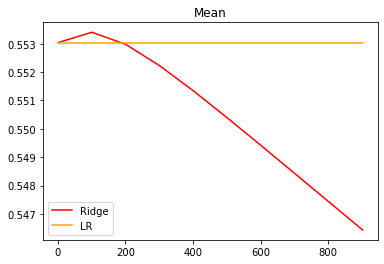

In [12]:


import matplotlib.pyplot as plt 

alpharange = np.arange(1,1001,100)
ridge, lr = [], []

for alpha in alpharange: 
    
    reg_ridge = Ridge(alpha=alpha)
    linear = LR()
    regs = cross_val_score(reg_ridge,x,y,cv = 5).mean() 
    linears = cross_val_score(linear,x,y,cv = 5).mean() 
    ridge.append(regs)
    lr.append(linears) 
    
plt.plot(alpharange,ridge,color="red",label="Ridge") 
plt.plot(alpharange,lr,color="orange",label="LR") 
plt.title("Mean")
plt.legend() 
plt.show()

#细化一下学习曲线
#alpharange = np.arange(1,201,10)



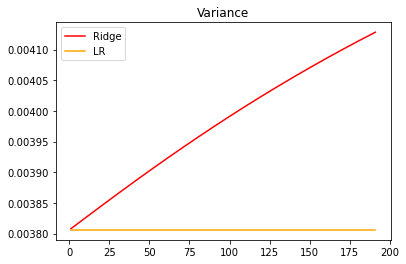

In [13]:



#不同正则项系数α下模型得方差变化

alpharange = np.arange(1,201,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LR()
    varR = cross_val_score(reg,x,y,cv=5).var() 
    varLR = cross_val_score(linear,x,y,cv=5).var() 
    ridge.append(varR)
    lr.append(varLR)

    
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR") 
plt.title("Variance")
plt.legend()
plt.show()




### Lasso

In [14]:


from sklearn.linear_model import Lasso                  #从线性模块中导入Lasso

reg_lasso = Lasso(alpha = 0.5)                           #实例化，设置正则项系数0.5
reg_lasso = reg_lasso.fit(Xtrain_ssd, Ytrain)            #拟合训练集数据
reg_lasso.score(Xtest_ssd, Ytest)                        #调用socre接口返回R2

mean_squared_error(Ytest, reg_lasso.predict(Xtest_ssd))  #查看均方误差
[*zip(Xtrain.columns, reg_lasso.coef_)]                  #查看特征对应的相关系数



[('该街区住户的收入中位数', 0.28885786149329357),
 ('该街区房屋使用年代的中位数', 0.0),
 ('该街区平均的房间数目', 0.0),
 ('该街区平均的卧室数目', -0.0),
 ('街区人口', -0.0),
 ('平均入住率', -0.0),
 ('街区的纬度', -0.0),
 ('街区的经度', -0.0)]

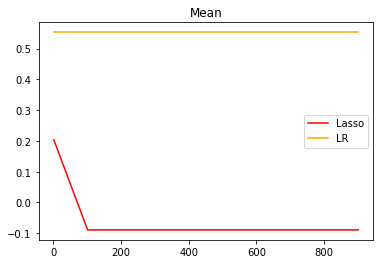

In [15]:


alpharange = np.arange(1,1001,100)
lasso, lr = [], []

for alpha in alpharange: 
    
    reg_lasso = Lasso(alpha=alpha)
    linear = LR()
    MeanLasso = cross_val_score(reg_lasso,x,y,cv = 5).mean() 
    MeanLinears = cross_val_score(linear,x,y,cv = 5).mean() 
    lasso.append(MeanLasso)
    lr.append(MeanLinears) 
    
plt.plot(alpharange,lasso,color="red",label="Lasso") 
plt.plot(alpharange,lr,color="orange",label="LR") 
plt.title("Mean")
plt.legend() 
plt.show()

#细化一下学习曲线
#alpharange = np.arange(0.001,1,0.01)




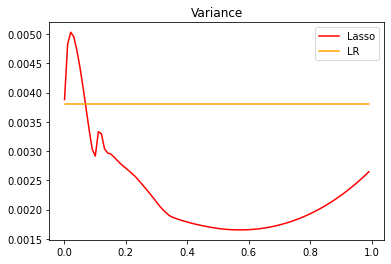

In [16]:

#不同正则项系数α下模型得方差变化

alpharange = np.arange(0.001,1,0.01)
lasso, lr = [], []
for alpha in alpharange:
    reg = Lasso(alpha=alpha)
    linear = LR()
    varR = cross_val_score(reg,x,y,cv=5).var() 
    varLR = cross_val_score(linear,x,y,cv=5).var() 
    lasso.append(varR)
    lr.append(varLR)

    
plt.plot(alpharange,lasso,color="red",label="Lasso")
plt.plot(alpharange,lr,color="orange",label="LR") 
plt.title("Variance")
plt.legend()
plt.show()


### L1 vs. L2

<img src="./L1_vs_L2.jpg" style="zoom:100%" />

## 多项式回归

In [17]:
from sklearn.preprocessing import PolynomialFeatures 

In [18]:
poly = PolynomialFeatures(degree=2).fit(Xtrain_ssd)

In [19]:
x_train_poly = poly.transform(Xtrain_ssd)
x_test_poly = poly.transform(Xtest_ssd)

In [20]:
reg_ploy = LR().fit(x_train_poly,Ytrain) 
yhat_ploy = reg_ploy.predict(x_test_poly)

In [21]:
reg_ploy.score(x_test_poly,Ytest)

0.45048752301767925

In [22]:
reg_ploy.score(x_train_poly,Ytrain)

0.6793213147467347

In [23]:
yhat_ploy

array([1.54786319, 2.54596469, 2.68931286, ..., 0.8032664 , 1.55785352,
       1.27687031])

In [24]:
mean_squared_error(Ytest, yhat_ploy)

0.744404932283472

In [25]:
reg_ploy.coef_

array([-4.67411619e-16,  9.01264753e-01,  1.30098246e-01, -4.05730450e-01,
        5.69648764e-01,  3.85103249e-02, -1.01766385e+00, -1.29090863e+00,
       -1.18123291e+00, -1.24228156e-01,  4.27505835e-02,  2.76619904e-01,
       -2.15098584e-01,  1.14972644e-01, -3.09156439e-02, -6.44464322e-01,
       -5.77830367e-01,  3.41564976e-02, -2.04784108e-02,  5.75610379e-02,
        4.05316885e-02, -1.53354090e-01, -2.63156349e-01, -2.46179393e-01,
        3.63838886e-02, -6.57219862e-02, -1.91844524e-01,  5.75580688e-01,
        5.12161470e-01,  4.59988632e-01,  2.90824754e-02,  2.83388420e-01,
       -3.82983999e-01, -4.67369635e-01, -4.04356235e-01,  3.77336262e-03,
        1.29907275e-01,  3.46748804e-02,  1.44643885e-02,  3.06767169e-03,
        3.50269845e-01,  2.62469634e-01,  2.83264942e-01,  4.56988128e-01,
        1.58584863e-01])